In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 查看数据集

In [3]:
def checkdf(time_freq):
    df = pd.read_csv('labeled_features/features_' + time_freq + '.csv', parse_dates=['date'])
    # 将第一个列设为索引
    print('df.shape',df.shape)
    print('df.index',df.index)
    print('df.columns',df.columns)
    df.info()

    # 设置绘图样式
    plt.figure(figsize=(30, 2))
    plt.axis('tight')
    plt.axis('off')

    # 创建一个表格对象
    tbl = plt.table(cellText=df.head().values, colLabels=df.columns, cellLoc='center', loc='center')


    tbl.scale(1.2, 1.2)

    # 保存为图片
    plt.savefig('dataframe_head_transparent.png', bbox_inches='tight', pad_inches=0.5, transparent=True)

    plt.show()
    return df

df.shape (482157, 16)
df.index RangeIndex(start=0, stop=482157, step=1)
df.columns Index(['date', 'pump_index', 'std_rush_order', 'avg_rush_order', 'std_trades',
       'std_volume', 'avg_volume', 'std_price', 'avg_price', 'avg_price_max',
       'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos', 'symbol', 'gt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482157 entries, 0 to 482156
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            482157 non-null  datetime64[ns]
 1   pump_index      482157 non-null  int64         
 2   std_rush_order  482157 non-null  float64       
 3   avg_rush_order  482157 non-null  float64       
 4   std_trades      482157 non-null  float64       
 5   std_volume      482157 non-null  float64       
 6   avg_volume      482157 non-null  float64       
 7   std_price       482157 non-null  float64       
 8   avg_price       

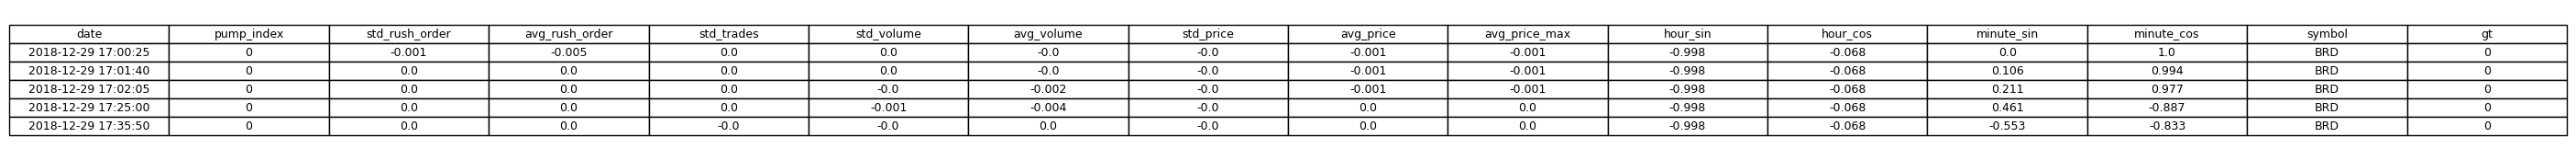

In [4]:
df = checkdf('25S')

In [5]:
df.describe()

,date,pump_index,std_rush_order,avg_rush_order,std_trades,std_volume,avg_volume,std_price,avg_price,avg_price_max,hour_sin,hour_cos,minute_sin,minute_cos,gt
count,482157,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000,482157.000000
mean,2019-06-06 17:57:25.193941248,163.651914,0.000456,-0.000110,0.000933,0.002112,0.000097,-0.000135,-0.000014,-0.000006,-0.083772,0.028490,-0.012240,0.023586,0.000657
min,2018-01-02 18:14:35,0.000000,-0.546000,-0.255000,-0.543000,-0.774000,-0.405000,-0.360000,-0.024000,-0.025000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000
25%,2018-09-21 15:31:15,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001000,-0.001000,-0.001000,-0.731000,-0.577000,-0.716000,-0.698000,0.000000
50%,2019-05-13 05:57:05,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.136000,-0.068000,0.000000,0.080000,0.000000
75%,2020-04-02 15:18:45,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.631000,0.683000,0.678000,0.735000,0.000000
max,2021-01-19 16:58:20,336.000000,15.510000,1.294000,30.708000,71.043000,6.658000,1.756000,0.311000,0.916000,0.998000,1.000000,1.000000,1.000000,1.000000
std,NaN,98.853939,0.059436,0.007755,0.098056,0.219304,0.022000,0.004577,0.001459,0.002069,0.693841,0.714758,0.698921,0.714692,0.025633


### 删除没有pump的pump_index的所有行

In [6]:
def del_no_pump_index(time_freq):
    """
    Deletes the rows where the pump is not running
    """
    df = pd.read_csv('labeled_features/features_' + time_freq + '.csv', parse_dates=['date'])
    # 将第一个列设为索引
    orginal = df.shape[0]

    # 找出没有被pump的pump_index
    pump_index = df['pump_index'].unique()
    nopump_index = []
    nopump_symbol = []
    for i in pump_index:
        df_pump = df[df['pump_index'] == i]
        # 如果df_pump的列gt不存在等于1, 打印i
        if 1 not in df_pump['gt'].values:
            nopump_symbol.append(df_pump['symbol'].unique().tolist()[0])
            nopump_index.append(i)
    print('nopump_index: ', nopump_index)
    print('nopump_symbol: ', nopump_symbol)

    print('df.shape: ', df.shape)
    print(df['pump_index'].unique().shape)

    # 删除pump_index的值等于48的行
    for i in nopump_index:
        df = df.drop(df[df['pump_index'] == i].index)

    print('df_cleaned.shape: ', df.shape)
    print(df['pump_index'].unique().shape)
    now = df.shape[0]
    print('deleted: ', orginal - now)
    return df

In [7]:
df_25S = del_no_pump_index('25S')
df_15S = del_no_pump_index('15S')
df_5S = del_no_pump_index('5S')

nopump_index:  [48, 149, 156, 180, 224, 264, 299, 300, 330, 331]
nopump_symbol:  ['YOYOW', 'DUSK', 'VIA', 'VIA', 'VIB', 'GXS', 'HC', 'RDN', 'RDN', 'WINGS']
df.shape:  (482157, 16)
(327,)
df_cleaned.shape:  (482137, 16)
(317,)
deleted:  20
nopump_index:  [48, 149, 156, 180, 224, 264, 299, 300, 330, 331]
nopump_symbol:  ['YOYOW', 'DUSK', 'VIA', 'VIA', 'VIB', 'GXS', 'HC', 'RDN', 'RDN', 'WINGS']
df.shape:  (584104, 16)
(327,)
df_cleaned.shape:  (584081, 16)
(317,)
deleted:  23
nopump_index:  [48, 149, 156, 180, 224, 264, 300, 327, 330, 331]
nopump_symbol:  ['YOYOW', 'DUSK', 'VIA', 'VIA', 'VIB', 'GXS', 'RDN', 'GRS', 'RDN', 'WINGS']
df.shape:  (821307, 16)
(327,)
df_cleaned.shape:  (821275, 16)
(317,)
deleted:  32


### Before_Pump dataset

In [8]:
### 删除每个pump_index中gt=1后的所有数据
def before_pump_dataset(df, timefreq):
    print('Orginal',df.shape)
    pump_index = df['pump_index'].unique()
    # Create an empty DataFrame to store the results
    merged_df = pd.DataFrame()
    for index in pump_index:
        df_0 = df[df['pump_index']==index]
        # 将索引改成第一列, 时间并排序
        df_0 = df_0.sort_values(by=['date'])
        df_0 = df_0.set_index('date')

        # gt=1的数据按照时间后面的数据都不要了
        gt_index = df_0[df_0['gt']==1].index

        # gt_index后1小时的数据
        gt_index = gt_index + pd.Timedelta(hours=1)

        # 选取gt_index之前的数据
        df_forward = df_0.loc[:gt_index[0]]

        # Append df_0 to merged_df vertically
        merged_df = pd.concat([merged_df, df_forward])

    # save the merged_df to csv
    merged_df.to_csv('./before_pump/before_pump_'+timefreq+'.csv')
    print('before pump dataset shape',merged_df.shape)
    return merged_df

before_pump_25S = before_pump_dataset(df_25S, '25S')
before_pump_15S = before_pump_dataset(df_15S, '15S')
before_pump_5S = before_pump_dataset(df_5S, '5S')

Orginal (482137, 16)
before pump dataset shape (182534, 15)
Orginal (584081, 16)
before pump dataset shape (213841, 15)
Orginal (821275, 16)
before pump dataset shape (284236, 15)


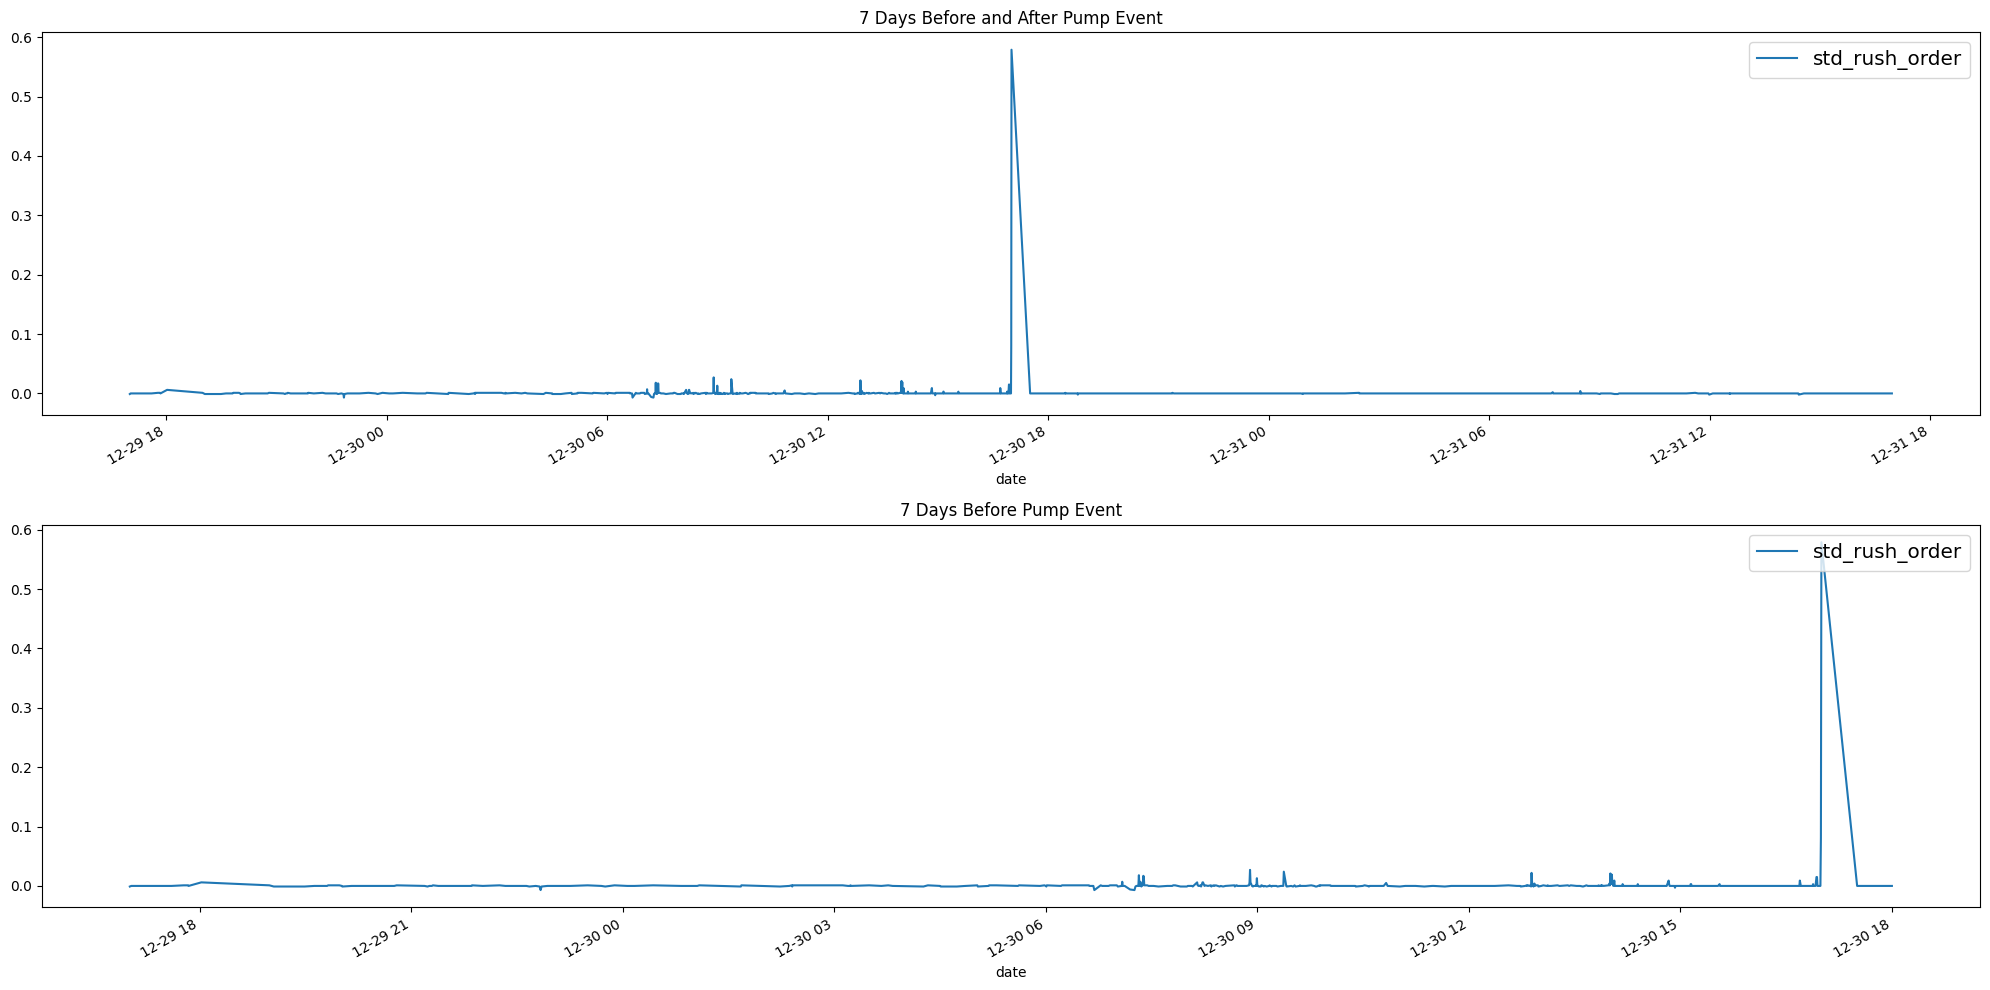

In [9]:
def plot_fliter(df, index, col):
    # 2行1列的图
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    # subplot1: 删除数据前的图
    ax1 = axes[0]
    df_0 = df[df['pump_index']==index]
    # 将索引改成第一列, 时间并排序
    df_0 = df_0.sort_values(by=['date'])
    df_0 = df_0.set_index('date')
    df_0[col].plot(ax=ax1)
    ax1.set_title('7 Days Before and After Pump Event')
    # plt.set_legend(['std_rush_order'])
    legend = ax1.legend(loc='upper right', fontsize='x-large')
    
    # subplot2: 删除数据后的图
    ax2 = axes[1]   
    df_0 = df[df['pump_index']==index]
    # 将索引改成第一列, 时间并排序
    df_0 = df_0.sort_values(by=['date'])
    df_0 = df_0.set_index('date')

    # gt=1的数据按照时间后面的数据都不要了
    gt_index = df_0[df_0['gt']==1].index

    # gt_index后1小时的数据
    gt_index = gt_index + pd.Timedelta(hours=1)

    # 选取gt_index之前的数据
    df_forward = df_0.loc[:gt_index[0]]

    df_forward[col].plot(ax=ax2)
    ax2.set_title('7 Days Before Pump Event')
    legend = ax2.legend(loc='upper right', fontsize='x-large')
    plt.tight_layout()
    plt.show()


cols = df_25S.columns
# col中去掉'symbol'
cols = cols.drop('date')
cols = cols.drop('pump_index')
cols = cols.drop('symbol')
cols = cols.drop('gt')
cols = cols.drop('hour_sin')
cols = cols.drop('hour_cos')
cols = cols.drop('minute_sin')
cols = cols.drop('minute_cos')

for col in cols:
    plot_fliter(df_25S,0, col=col)

    # 就画一张图
    break

(605, 15)
(447,)
(289,)
(131,)


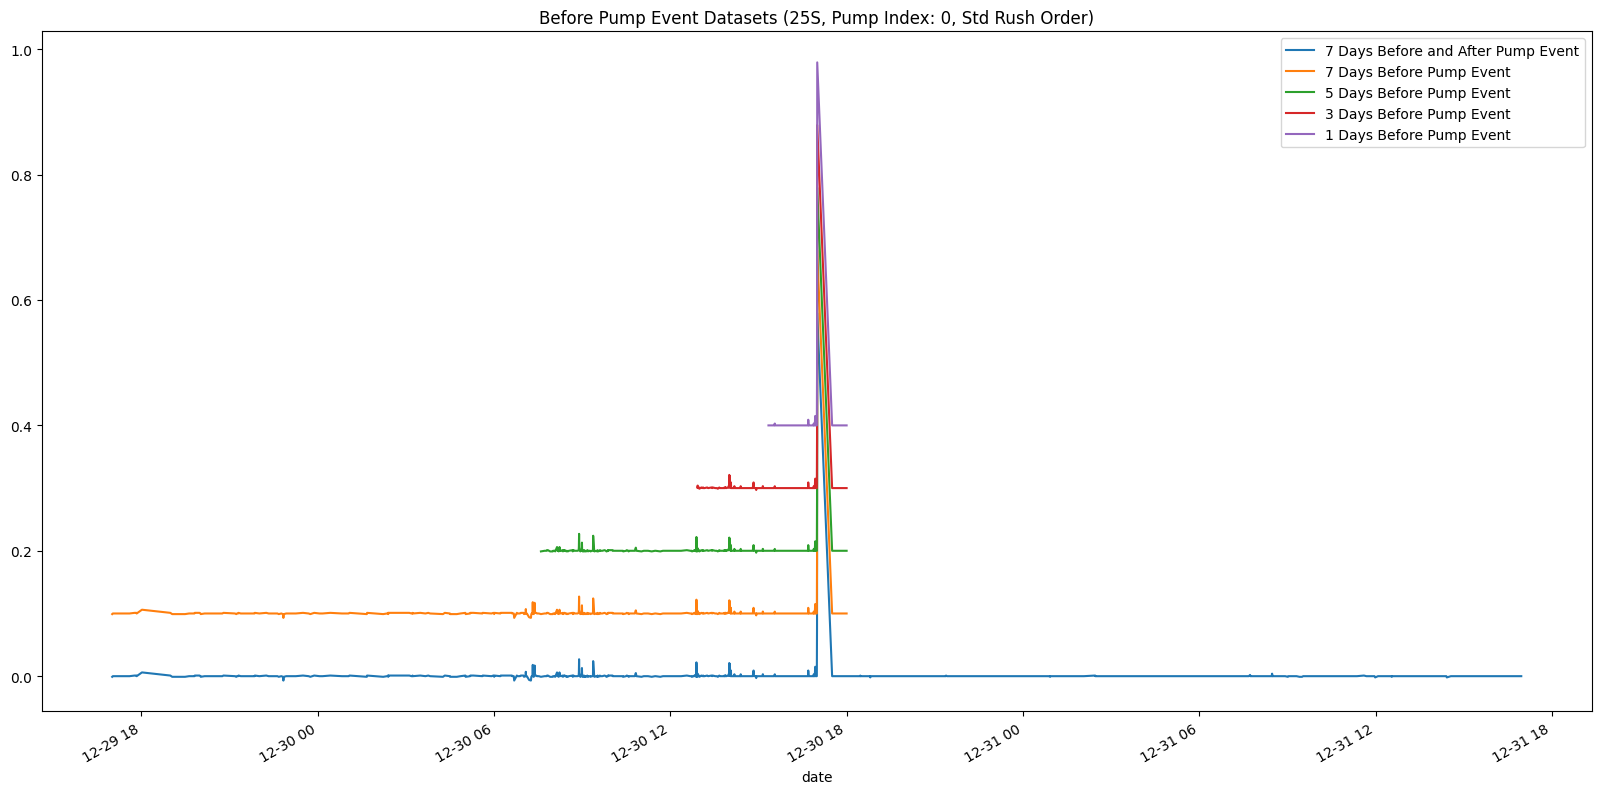

In [18]:

df = before_pump_25S
df_0 = df[df['pump_index']==0]
print(df_0.shape)

fig, axes = plt.subplots(figsize=(20, 10))

df_25S_0 = df_25S[df_25S['pump_index']==0]
# # 更改index为'date'
df_25S_0.index = df_25S_0['date']
df_25S_0['std_rush_order'].plot(label='7 Days Before and After Pump Event')




# 7 Days Before Pump Event 
# 图向上偏移一点，不然会重合
df_7 = df_0['std_rush_order']+0.1
df_7.plot(label='7 Days Before Pump Event')


# 5 Days Before Pump Event
gt_index = df_0[df_0['gt']==1].index
before_gt_number = len(df_0.loc[:gt_index[0]])
index = int(before_gt_number*2/7)
df_5 = df_0.iloc[index:]
df_5 = df_5['std_rush_order']+0.2
df_5.plot(label='5 Days Before Pump Event')
print(df_5.shape)

# 3 Days Before Pump Event
index = int(before_gt_number*4/7)
df_3 = df_0.iloc[index:]
df_3 = df_3['std_rush_order']+0.3
df_3.plot(label='3 Days Before Pump Event')
print(df_3.shape)

# 1 Days Before Pump Event
index = int(before_gt_number*6/7)
df_1 = df_0.iloc[index:]
df_1 = df_1['std_rush_order']+0.4
df_1.plot(label='1 Days Before Pump Event')
print(df_1.shape)

plt.title('Before Pump Event Datasets (25S, Pump Index: 0, Std Rush Order)')
# 添加图例
plt.legend()

plt.show()

In [11]:
def before_pump_1D_dataset(df, timefreq):
    pump_index = df['pump_index'].unique()
    # Create an empty DataFrame to store the results
    merged_df = pd.DataFrame()
    for index in pump_index:
        df_0 = df[df['pump_index']==index]
        # sort the data by date
        df_0 = df_0.sort_values(by=['date'])

        gt_index = df_0[df_0['gt']==1].index
        # 去掉gt_index前面数据的6/7
        
        before_gt_number = len(df_0.loc[:gt_index[0]])
        index = int(before_gt_number*6/7)

        df_0 = df_0.iloc[index:]

        # merge the data
        merged_df = pd.concat([merged_df, df_0], axis=0)
        # save the merged_df to csv
    merged_df.to_csv('./before_pump/before_pump_1D_'+timefreq+'.csv')
    print('before pump dataset shape',merged_df.shape)

    return merged_df

In [12]:
before_pump_1D_25S = before_pump_1D_dataset(before_pump_25S, '25S')
before_pump_1D_15S = before_pump_1D_dataset(before_pump_15S, '15S')
before_pump_1D_5S = before_pump_1D_dataset(before_pump_5S, '5S')

before pump dataset shape (38742, 15)
before pump dataset shape (48365, 15)
before pump dataset shape (74194, 15)


In [13]:
def before_pump_3D_dataset(df, timefreq):
    pump_index = df['pump_index'].unique()
    # Create an empty DataFrame to store the results
    merged_df = pd.DataFrame()
    for index in pump_index:
        df_0 = df[df['pump_index']==index]
        # sort the data by date
        df_0 = df_0.sort_values(by=['date'])

        gt_index = df_0[df_0['gt']==1].index
        # 去掉gt_index前面数据的6/7
        
        before_gt_number = len(df_0.loc[:gt_index[0]])
        index = int(before_gt_number*4/7)

        df_0 = df_0.iloc[index:]

        # merge the data
        merged_df = pd.concat([merged_df, df_0], axis=0)
        # save the merged_df to csv
    merged_df.to_csv('./before_pump/before_pump_3D_'+timefreq+'.csv')
    print('before pump dataset shape',merged_df.shape)

    return merged_df

before_pump_3D_25S = before_pump_3D_dataset(before_pump_25S, '25S')
before_pump_3D_15S = before_pump_3D_dataset(before_pump_15S, '15S')
before_pump_3D_5S = before_pump_3D_dataset(before_pump_5S, '5S')

before pump dataset shape (86725, 15)
before pump dataset shape (103566, 15)
before pump dataset shape (144252, 15)


In [14]:
def before_pump_5D_dataset(df, timefreq):
    pump_index = df['pump_index'].unique()
    # Create an empty DataFrame to store the results
    merged_df = pd.DataFrame()
    for index in pump_index:
        df_0 = df[df['pump_index']==index]
        # sort the data by date
        df_0 = df_0.sort_values(by=['date'])

        gt_index = df_0[df_0['gt']==1].index
        # 去掉gt_index前面数据的6/7
        
        before_gt_number = len(df_0.loc[:gt_index[0]])
        index = int(before_gt_number*2/7)

        df_0 = df_0.iloc[index:]

        # merge the data
        merged_df = pd.concat([merged_df, df_0], axis=0)
        # save the merged_df to csv
    merged_df.to_csv('./before_pump/before_pump_5D_'+timefreq+'.csv')
    print('before pump dataset shape',merged_df.shape)

    return merged_df

before_pump_5D_25S = before_pump_5D_dataset(before_pump_25S, '25S')
before_pump_5D_15S = before_pump_5D_dataset(before_pump_15S, '15S')
before_pump_5D_5S = before_pump_5D_dataset(before_pump_5S, '5S')

before pump dataset shape (134699, 15)
before pump dataset shape (158771, 15)
before pump dataset shape (214312, 15)


### pump的数据可视化

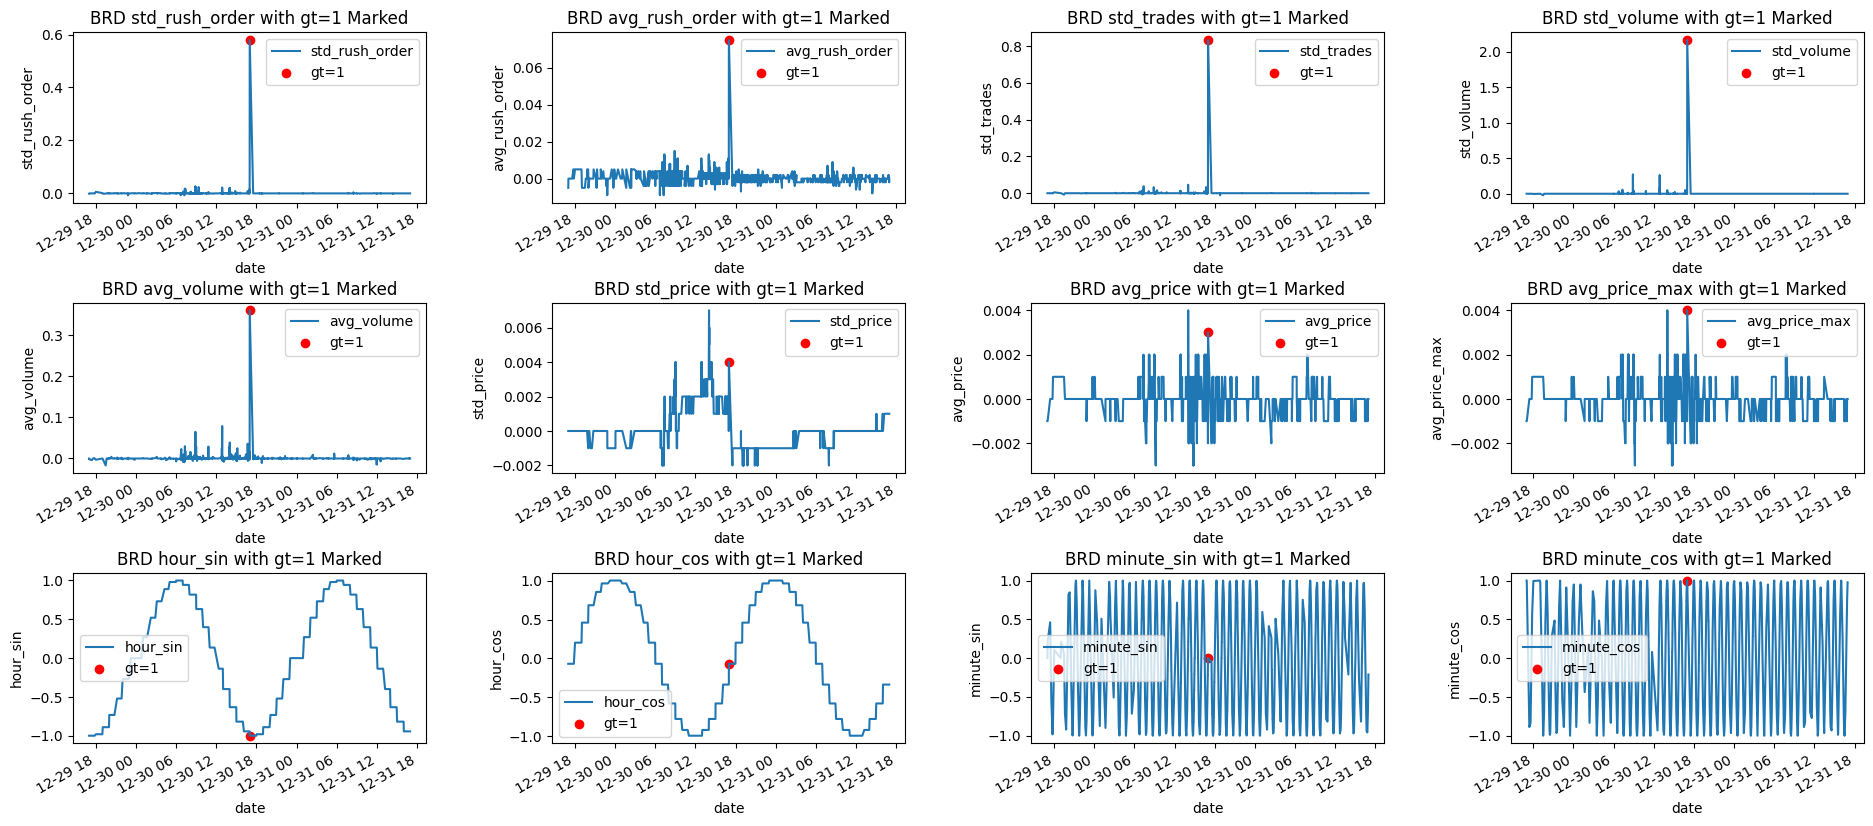

In [15]:
def plot_gt(time_freq, pump_index):
    df = pd.read_csv('labeled_features/features_' + time_freq + '.csv', parse_dates=['date'])
    # 第一列索引
    df.set_index('date', inplace=True)

    # 创建子图
    fig, axes = plt.subplots(3, 4, figsize=(20, 10))
    fig.tight_layout(pad=6.0)  # 调整子图之间的间距
    i = 0
    for col in df.columns:
        # 过滤掉不需要的列 'date' 'pump_index' 'symbol'
        if col not in ['date', 'pump_index', 'symbol']:
            # 获取特定pump_index的子DataFrame
            df_0 = df[df['pump_index'] == pump_index]
            symbol = df_0['symbol'].iloc[0]  # 使用iloc获取唯一的symbol
            
            # 获取子图的行列索引
            row_idx = i // 4
            col_idx = i % 4
            
            # 在对应子图上绘制数据
            ax = axes[row_idx, col_idx]
            df_0[col].plot(ax=ax)
            
            # 在该图上标注列gt的值等于1的数据点
            gt_1_data = df_0[df_0['gt'] == 1]
            ax.scatter(gt_1_data.index, gt_1_data[col], c='r', label='gt=1')
            
            ax.set_ylabel(col)
            ax.set_title(symbol + ' ' + col + ' with gt=1 Marked')
            ax.legend()
            
            i += 1
            # 一次只显示12个子图
            if i == 12:
                break

    # 显示所有子图
    plt.show()

pump_index = 0
plot_gt('25S', pump_index)

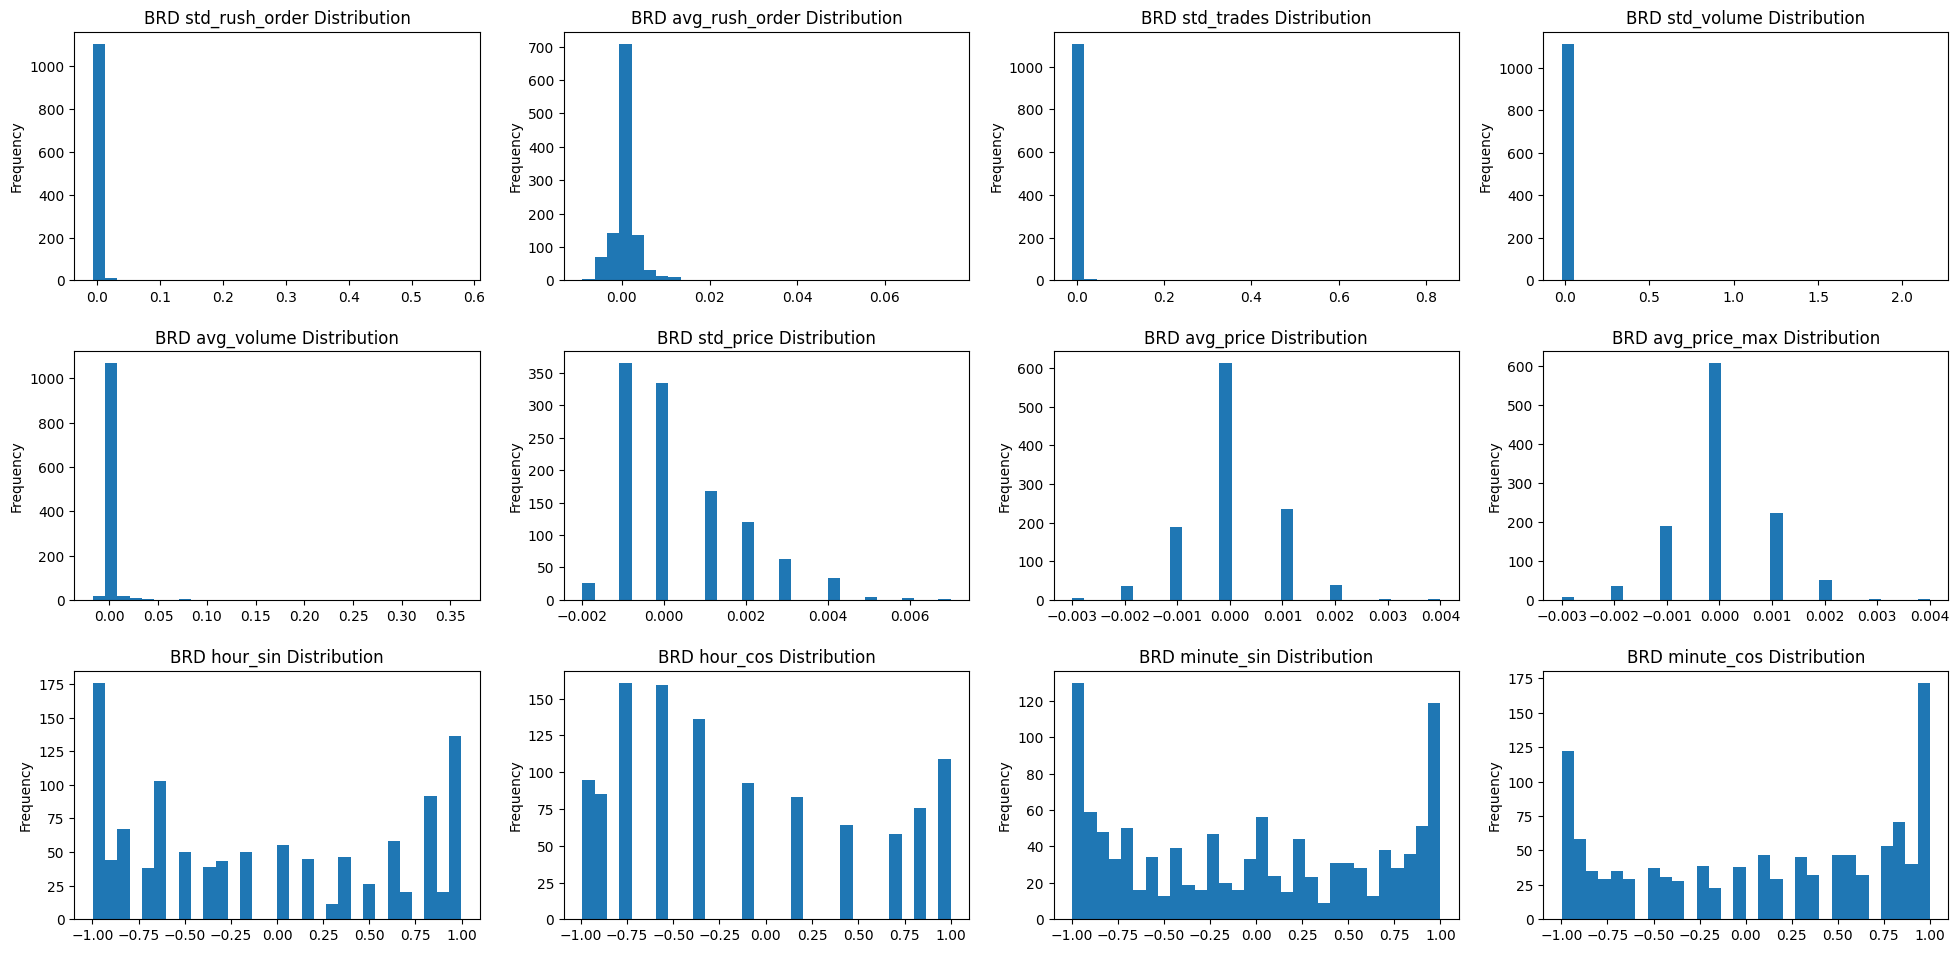

In [16]:
def draw_data_distribution(time_freq, pump_index):
    """
    画出df中除了date, pump_index, symbol, gt以外的所有特征的分布图
    用4行3列的子图表示
    :param df:
    :return:
    """
    # 删除不需要的列

    df = pd.read_csv('labeled_features/features_' + time_freq + '.csv', parse_dates=['date'])
    df = df[df['pump_index'] == pump_index]

    columns_to_plot = [col for col in df.columns if col not in ['date', 'pump_index', 'symbol', 'gt']]

    symbols = df['symbol'].unique().tolist()[0]
    # 计算子图行列数
    num_rows = 3
    num_cols = 4

    # 创建子图
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    fig.tight_layout(pad=3.0)  # 调整子图之间的间距

    for i, col in enumerate(columns_to_plot):
        # 获取当前子图的行列索引
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        # 在对应子图上绘制分布图
        ax = axes[row_idx, col_idx]
        df[col].plot(kind='hist', ax=ax, bins=30)
        
        ax.set_ylabel('Frequency')
        ax.set_title(symbols+ ' ' + col + ' Distribution')

    # 处理不满足子图数目的空白子图
    for i in range(len(columns_to_plot), num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row_idx, col_idx])

    # 显示所有子图
    plt.show()

draw_data_distribution('25S', 0)

5S 45


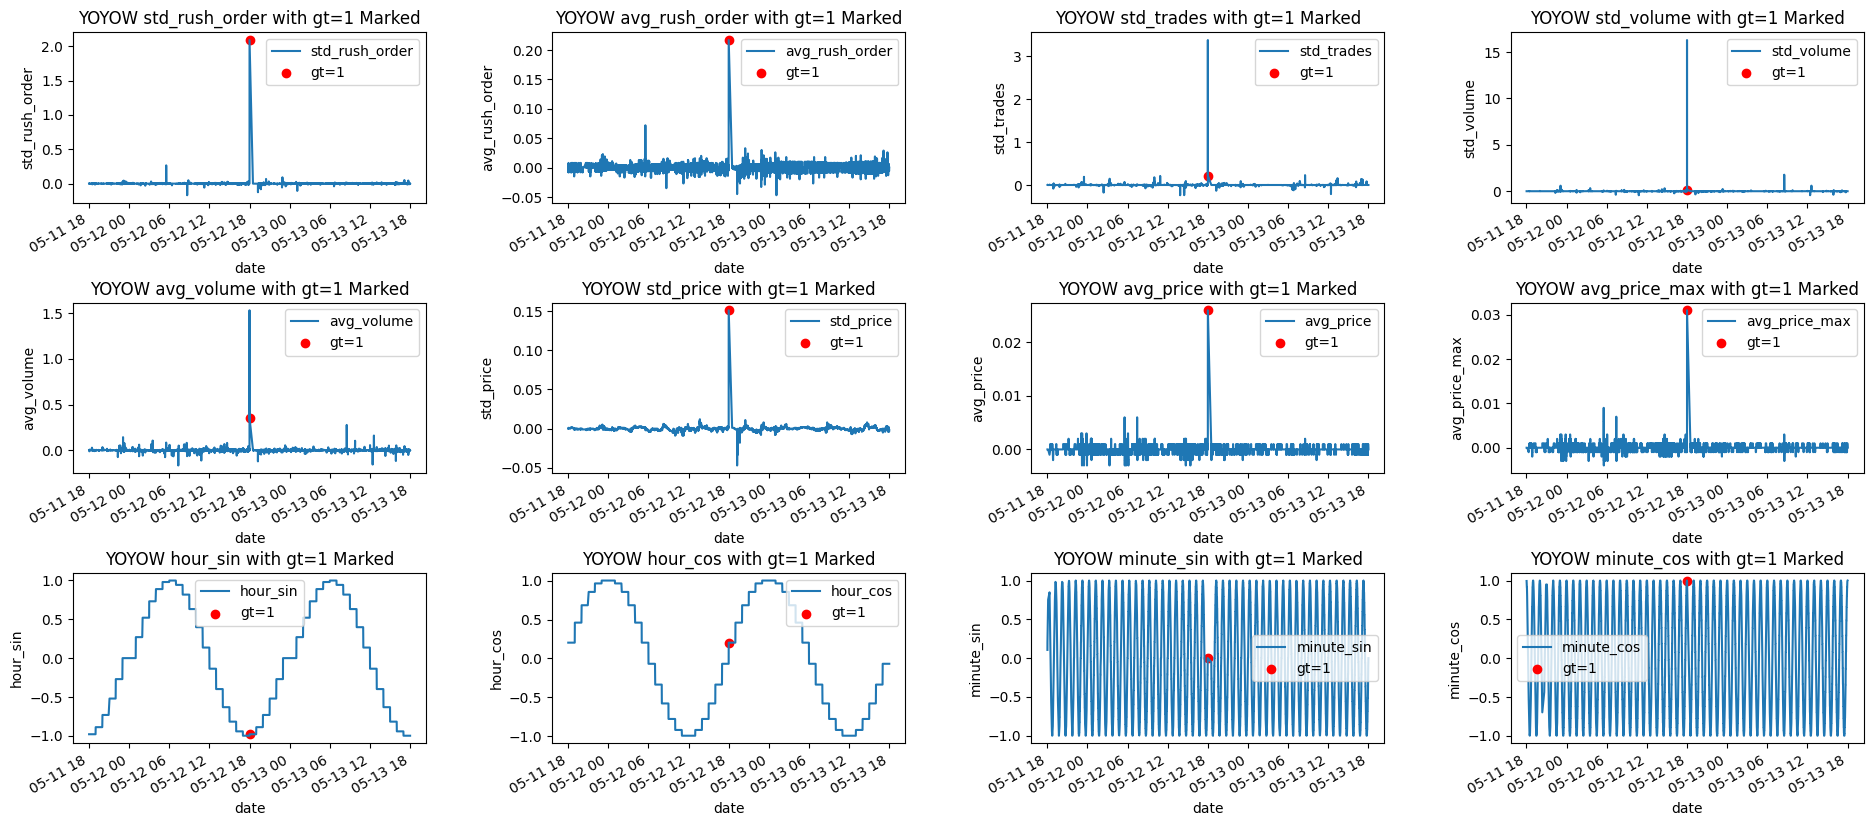

5S 107


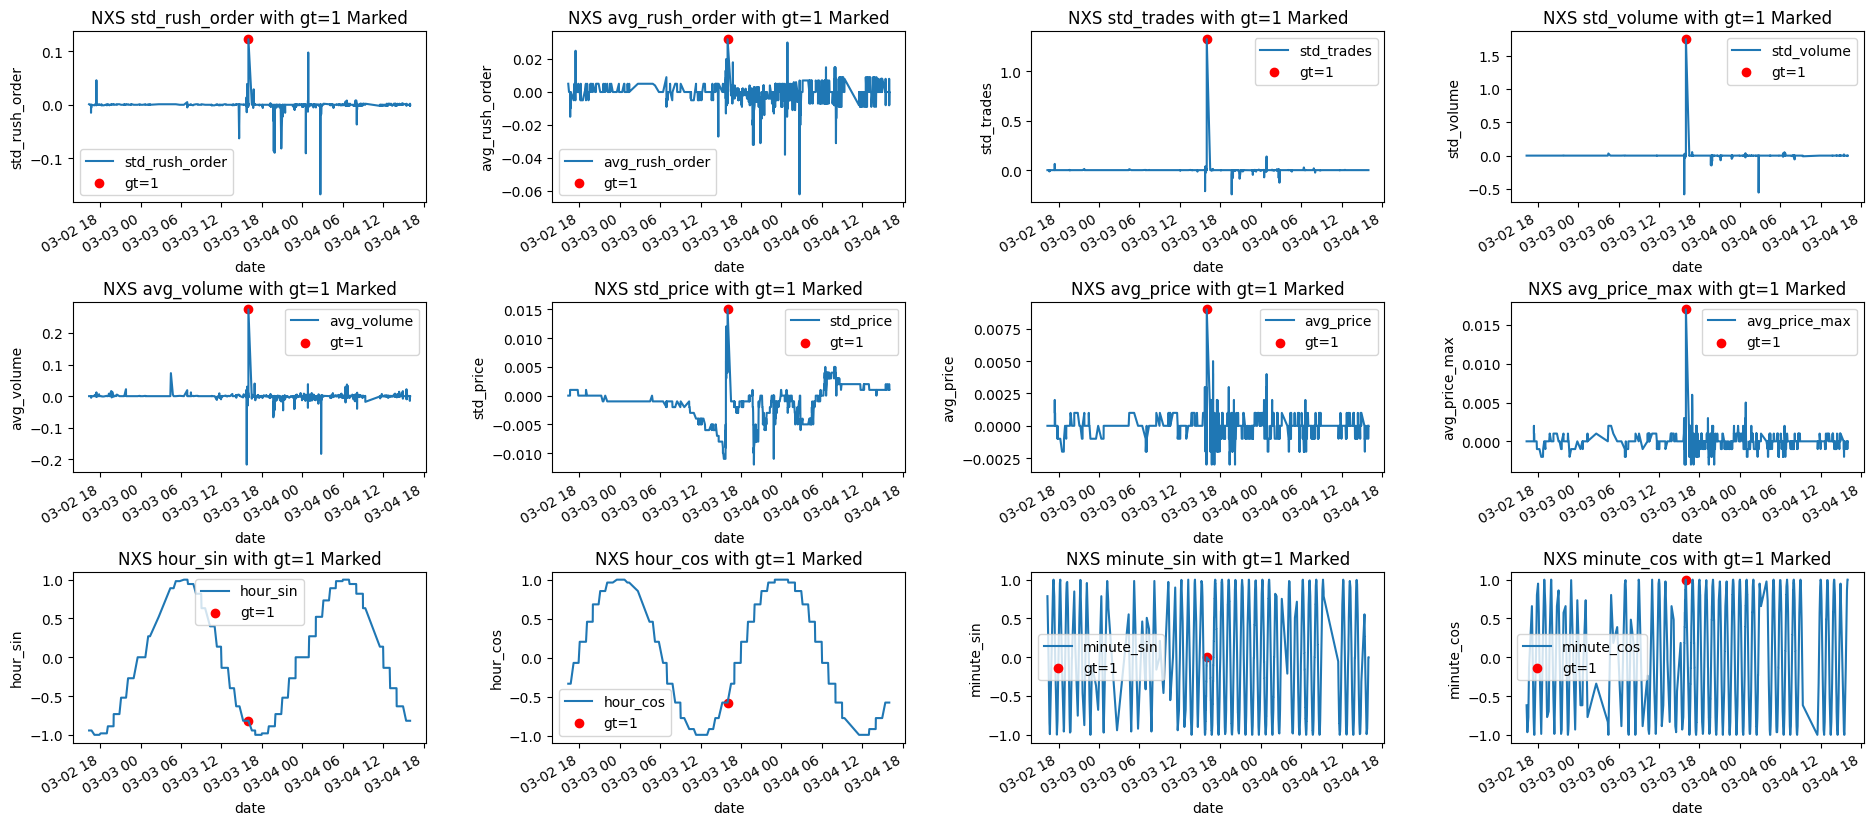

5S 193


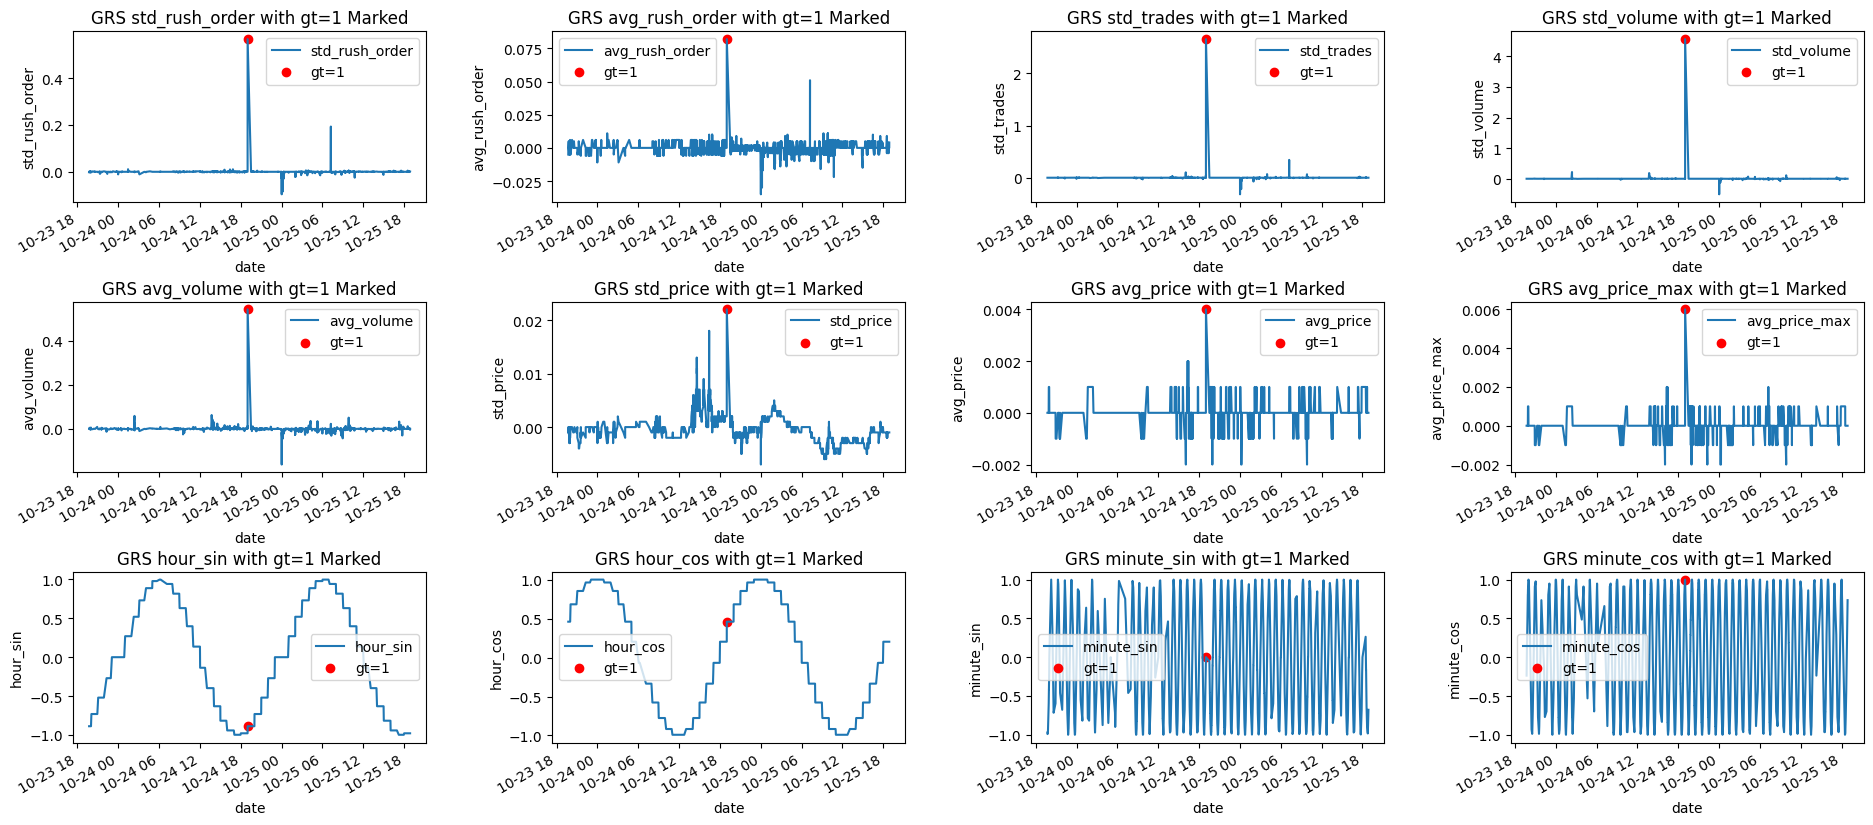

5S 177


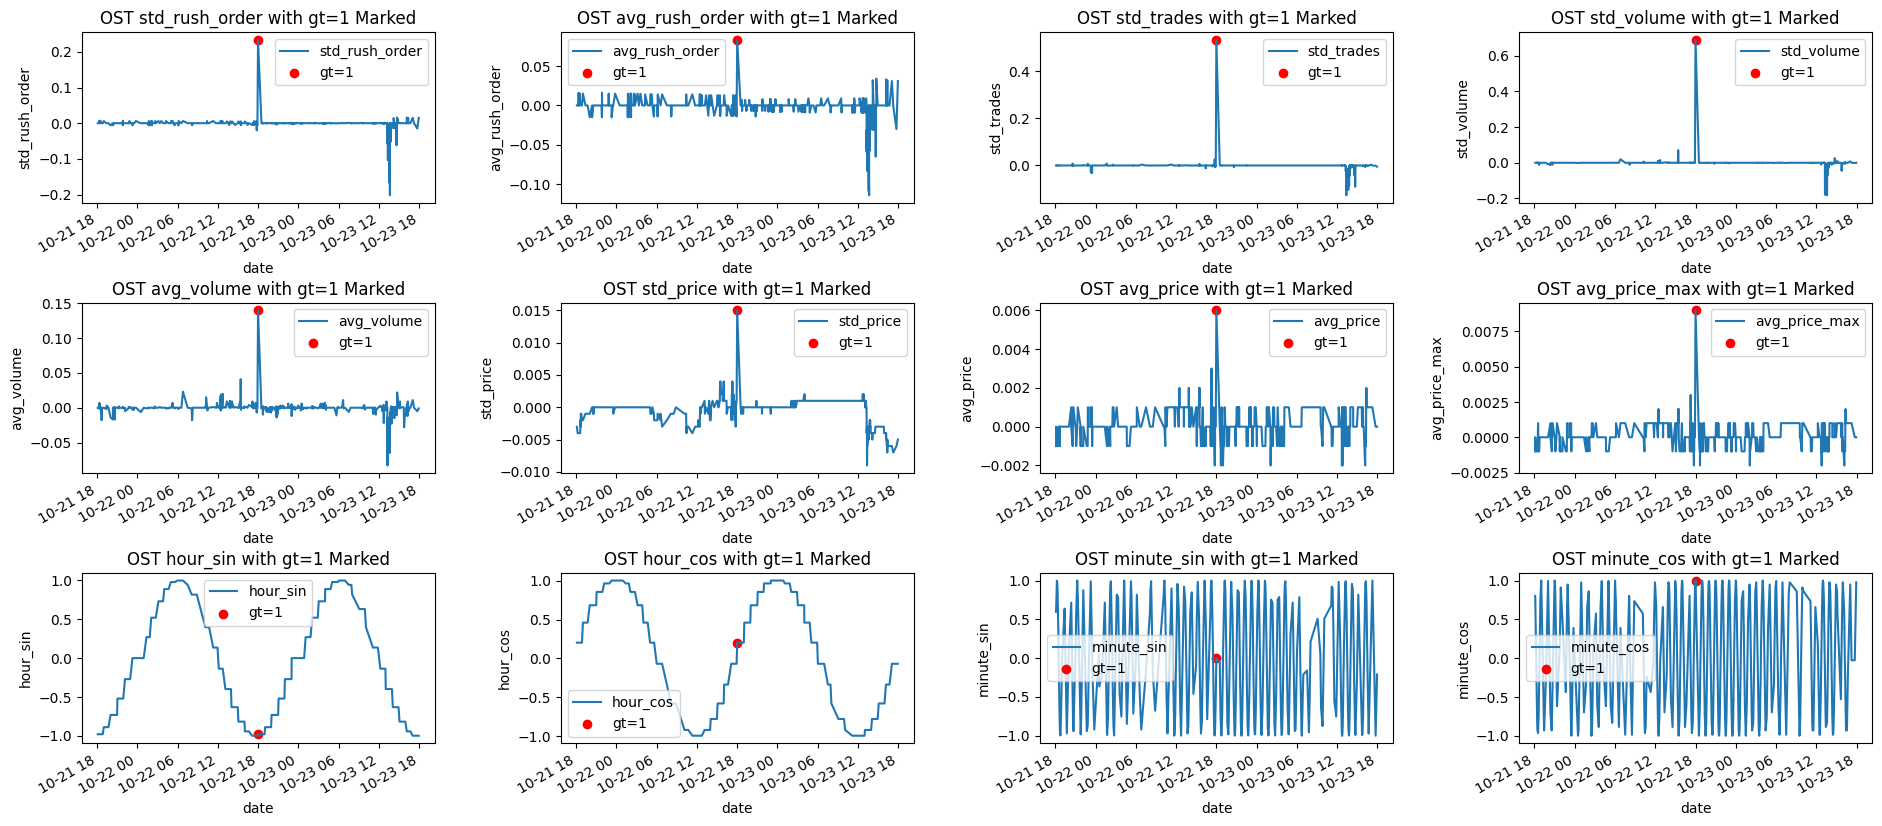

5S 1


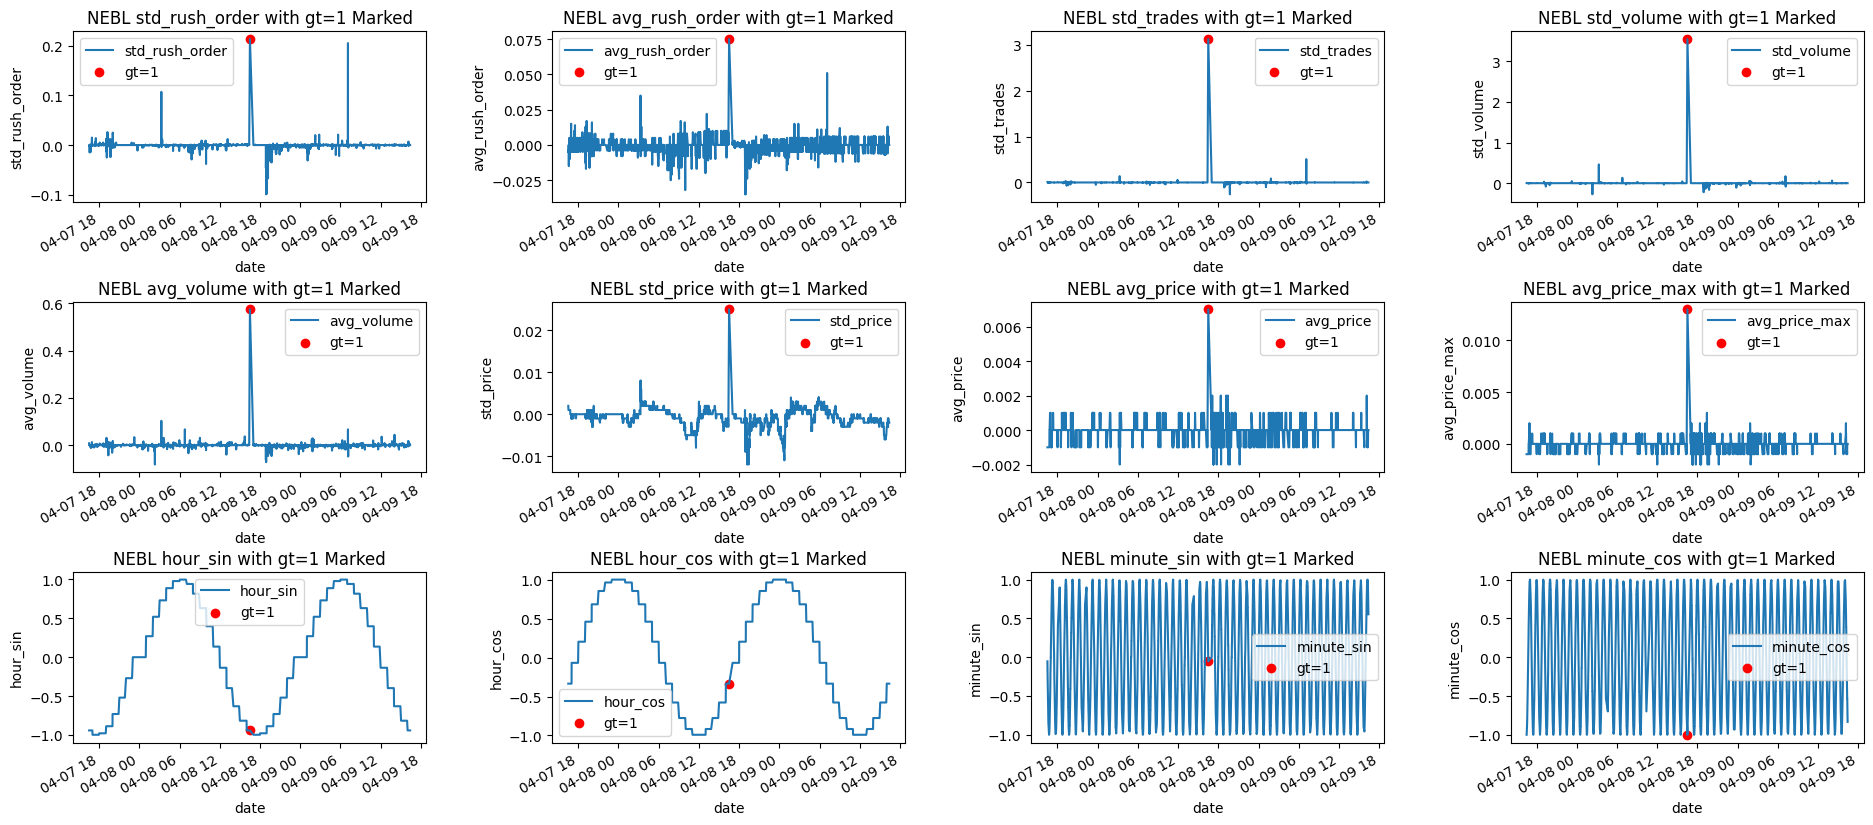

In [17]:
# (0,300)随机数

# 生成10000个范围在(0, 300)之间的随机整数
random_data = np.random.uniform(low=0, high=300, size=5)
random_data = random_data.astype(int)

for i in random_data:
    print('5S', i)
    plot_gt('5S', i)